In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import time
from urllib.parse import urljoin
import os
import string
import re
from nltk.stem import *
import nltk
import itertools
import math
import operator
import sys
from statistics import mean
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from os import path

In [5]:
url = "https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/"

code = requests.get(url)
plain = code.text
soup = BeautifulSoup(plain, 'html.parser')
title = soup.find('title')

print(title)

<title>
        School of Life Sciences – Research output
     — Coventry University</title>


# Crawler

In [6]:
# Extract pages
pages_collected = set() 
pages_to_collect = set() 
base_url = 'https://pureportal.coventry.ac.uk'
 
def pages(url): 
    print('Crawl: ', url) 
    response = requests.get(url) 
    soup = BeautifulSoup(response.content, 'html.parser') 
    pages_collected.add(url) 
    for a in soup.find_all('a', {'class':'step'}): 
        link = a.get('href') 
        if link.startswith('/en'):
            link = base_url + link
            pages_to_collect.add(link) 
            if link not in pages_collected: 
                pages(link) 
        else:
            pages_to_collect.add(link) 
            if link not in pages_collected: 
                pages(link) 
pages('https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/') 
 
print(pages_collected) 

Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=1
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=2
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=3
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=4
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=5
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=6
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=7
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=8
Crawl:  https://pureportal.coventry.ac.uk/en/organisations/school-of-li

In [7]:
# Total number of pages
len(pages_collected)

14

In [44]:
meta_data = {
      'Title': [],
      'Title_link': [],
      'Author': [],
      'Author_link': [],
      'Date': []
    }

In [43]:
meta_data.clear()

In [24]:
import pandas as pd

def export_meta_table(meta_data):
    print('exporting to excel')
    table = pd.DataFrame(meta_data, columns=[
                             'Title', 'Title_link', 'Author', 'Author_link', 'Date'])
    table.index = table.index + 1
    table.to_csv('D:\Coventry\IR\IR_CW\Metadata.csv',
                     sep=',', encoding='utf-8', index=False)
    print('Scraping done.')

In [25]:
def get_pub_attributes(pub):
    # Getting the publication attributes
    title = pub.find('a',{'class':'link'}).text
    title_link = pub.find('a',{'class':'link'})['href']
    author = pub.find('a',{'class':'link person'}).text if pub.find('a',{'class':'link person'}) else ''
    author_link = pub.find('a',{'class':'link person'})['href'] if pub.find('a',{'class':'link person'}) else ''
    date_1 = pub.find('span',{'class':'date'})
    date = str(date_1).lstrip('<span class="date">').rstrip('</span>') 
    # Store the values into the 'data' object
    meta_data['Title'].append(title)
    meta_data['Title_link'].append(title_link)
    meta_data['Author'].append(author)
    meta_data['Author_link'].append(author_link)
    meta_data['Date'].append(date)

In [31]:
def parse_page(next_url):
        # HTTP GET requests
    page = requests.get(next_url, headers={'User-Agent': 'Mozilla/5.0'})
      # Checking if we successfully fetched the URL
    if page.status_code == requests.codes.ok:
        p = page.text
        s = BeautifulSoup(p, "html.parser")
        pub_content = s.find_all('div',{'class':'result-container'})
        for pub in pub_content:
            get_pub_attributes(pub)

        export_meta_table(meta_data)

In [42]:
import time

rob = ['format=rss', 'export=xls']

def run_by_page():
    for page in pages_collected:
        if page[-10:] not in rob:
            time.sleep(5)
            print(page)
            parse_page(page)
        else:
            print('Robot.txt Disallow')

In [45]:
run_by_page()

https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=5
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=4
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=8
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=7
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=2
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=12
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?page=3
exporting to excel
Scraping done.
https://pureportal.coventry.ac.uk/en/organisations/school-of-life-sciences/publications/?

# ---

In [138]:
Research_link_set = set(meta_data['Title_link'])
print(len(Research_link_set))

658


In [140]:
data_re = {
      'URL': [],
      'Title': [],
      'Abstract': []
    }

In [ ]:
data_re.clear()

In [144]:
def export_data_table(data_re):
    print('exporting to excel')
    table = pd.DataFrame(data_re, columns=[
                             'URL', 'Title', 'Abstract'])
    table.index = table.index + 1
    table.to_csv('D:\Coventry\IR\IR_CW\Data.csv',
                     sep=',', encoding='utf-8', index=False)
#    print(table)
    print('Scraping done.')

In [143]:
def get_main_attributes(main):
      # Getting the CD attributes

    r = requests.get(main) 
    p = r.text
    s = BeautifulSoup(p, "html.parser")
    title = s.find('h1').text
    abstract = s.find('div',{'class':'textblock'}).text if s.find('div',{'class':'textblock'}) else ''

        # Store the values into the 'data' object
    data_re['URL'].append(str(main))
    data_re['Title'].append(title)
    data_re['Abstract'].append(abstract)

    export_data_table(data_re)
    

In [139]:
def run_by_re():
    for re in Research_link_set:
        if page[-10:] not in rob:
            time.sleep(1)
            print(re)
            get_main_attributes(re)
        else:
            print('Robot.txt Disallow')

In [ ]:
run_by_re()

In [118]:
!pip install schedule

In [119]:
import schedule
import time


schedule.every().firday.at("18:00").do(run_by_page)

while True:
  
    # Checks whether a scheduled task 
    # is pending to run or not
    schedule.run_pending()
    time.sleep(1)

# Information collected 

In [46]:
# Converting to DataFrame
data_index = pd.DataFrame(meta_data, columns=[
                             'Title', 'Title_link', 'Author', 'Author_link', 'Date'])

In [47]:
data_index.head()

,Title,Title_link,Author,Author_link,Date
0,The Effect of Increasing Age on the Concentric...,https://pureportal.coventry.ac.uk/en/publicati...,"James, R. S.",https://pureportal.coventry.ac.uk/en/persons/r...,17 Apr 2018
1,The effects of 10 weeks Integrated Neuromuscul...,https://pureportal.coventry.ac.uk/en/publicati...,"Duncan, M.",https://pureportal.coventry.ac.uk/en/persons/m...,1 Dec 2018
2,The effects of exercise referral schemes in th...,https://pureportal.coventry.ac.uk/en/publicati...,"Rowley, N.",https://pureportal.coventry.ac.uk/en/persons/n...,2 Aug 2018
3,The Effects of Low and Moderate Dose Caffeine ...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Mar 2018
4,The effects of obesity on skeletal muscle cont...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Jul 2018


In [48]:
data_index.shape

(658, 5)

In [111]:
Total_num_authors = set()
for auth in data_index['Author']:
    Total_num_authors.add(auth)

In [113]:
print('Approximate number of staff whose publications are crawled: '+ str(len(Total_num_authors)))

Approximate number of staff whose publications are crawled: 112


In [115]:
research_per_author =  data_index.groupby('Author')['Author'].count()
print('Maximum number of publications per staff: ')
print(research_per_author.sort_values(ascending = False).head())

Maximum number of publications per staff: 
Author
                 143
Duncan, M.        37
Duncan, M. J.     26
Tallis, J.        18
Mundy, P.         14
Name: Author, dtype: int64


# Preprocessing

In [49]:
# Combining Author name and Title
data_index["Text"] = data_index["Title"] + " " + data_index["Author"]

In [51]:
# Combined result
data_index["Text"][0]

'The Effect of Increasing Age on the Concentric and Eccentric Contractile Properties of Isolated Mouse Soleus and Extensor Digitorum Longus Muscles James, R. S.'

In [50]:
data_index.head()

,Title,Title_link,Author,Author_link,Date,Text
0,The Effect of Increasing Age on the Concentric...,https://pureportal.coventry.ac.uk/en/publicati...,"James, R. S.",https://pureportal.coventry.ac.uk/en/persons/r...,17 Apr 2018,The Effect of Increasing Age on the Concentric...
1,The effects of 10 weeks Integrated Neuromuscul...,https://pureportal.coventry.ac.uk/en/publicati...,"Duncan, M.",https://pureportal.coventry.ac.uk/en/persons/m...,1 Dec 2018,The effects of 10 weeks Integrated Neuromuscul...
2,The effects of exercise referral schemes in th...,https://pureportal.coventry.ac.uk/en/publicati...,"Rowley, N.",https://pureportal.coventry.ac.uk/en/persons/n...,2 Aug 2018,The effects of exercise referral schemes in th...
3,The Effects of Low and Moderate Dose Caffeine ...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Mar 2018,The Effects of Low and Moderate Dose Caffeine ...
4,The effects of obesity on skeletal muscle cont...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Jul 2018,The effects of obesity on skeletal muscle cont...


In [52]:
# For Document index
i = data_index.index.values
df_id = i.tolist()
type(df_id)

list

In [53]:
data_index['Id'] = df_id
data_index.tail()

,Title,Title_link,Author,Author_link,Date,Text,Id
653,Dissecting the components of the humoral immun...,https://pureportal.coventry.ac.uk/en/publicati...,"Burke, B.",https://pureportal.coventry.ac.uk/en/persons/b...,6 Feb 2006,Dissecting the components of the humoral immun...,653
654,Interaction of the transmembrane domain of lys...,https://pureportal.coventry.ac.uk/en/publicati...,"Mendel, S.",https://pureportal.coventry.ac.uk/en/persons/s...,Oct 2006,Interaction of the transmembrane domain of lys...,654
655,MRX protects telomeric DNA at uncapped telomer...,https://pureportal.coventry.ac.uk/en/publicati...,"Foster, S.",https://pureportal.coventry.ac.uk/en/persons/s...,13 Jul 2006,MRX protects telomeric DNA at uncapped telomer...,655
656,Structure of the regulatory subunit of acetohy...,https://pureportal.coventry.ac.uk/en/publicati...,"Mendel, S.",https://pureportal.coventry.ac.uk/en/persons/s...,31 Mar 2006,Structure of the regulatory subunit of acetohy...,656
657,Association of WNK1 gene polymorphisms and hap...,https://pureportal.coventry.ac.uk/en/publicati...,"Raleigh, S. M.",https://pureportal.coventry.ac.uk/en/persons/s...,29 Nov 2005,Association of WNK1 gene polymorphisms and hap...,657


In [54]:
data_index.Id = pd.Series(["D"+str(ind) for ind in data_index.Id])
data_index.head()

,Title,Title_link,Author,Author_link,Date,Text,Id
0,The Effect of Increasing Age on the Concentric...,https://pureportal.coventry.ac.uk/en/publicati...,"James, R. S.",https://pureportal.coventry.ac.uk/en/persons/r...,17 Apr 2018,The Effect of Increasing Age on the Concentric...,D0
1,The effects of 10 weeks Integrated Neuromuscul...,https://pureportal.coventry.ac.uk/en/publicati...,"Duncan, M.",https://pureportal.coventry.ac.uk/en/persons/m...,1 Dec 2018,The effects of 10 weeks Integrated Neuromuscul...,D1
2,The effects of exercise referral schemes in th...,https://pureportal.coventry.ac.uk/en/publicati...,"Rowley, N.",https://pureportal.coventry.ac.uk/en/persons/n...,2 Aug 2018,The effects of exercise referral schemes in th...,D2
3,The Effects of Low and Moderate Dose Caffeine ...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Mar 2018,The Effects of Low and Moderate Dose Caffeine ...,D3
4,The effects of obesity on skeletal muscle cont...,https://pureportal.coventry.ac.uk/en/publicati...,"Tallis, J.",https://pureportal.coventry.ac.uk/en/persons/j...,Jul 2018,The effects of obesity on skeletal muscle cont...,D4


In [55]:
# Extracting ID and Combined Text
df = data_index[['Id', 'Text']]
df.head()

,Id,Text
0,D0,The Effect of Increasing Age on the Concentric...
1,D1,The effects of 10 weeks Integrated Neuromuscul...
2,D2,The effects of exercise referral schemes in th...
3,D3,The Effects of Low and Moderate Dose Caffeine ...
4,D4,The effects of obesity on skeletal muscle cont...


In [56]:

df.Text = df.Text.str.replace(","," ")
df.Text = df.Text.str.replace(r'\W',' ')
df.Text = df.Text.str.strip().str.lower()

C:\Users\Johnson\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-56-66b942d1a651>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Text = df.Text.str.replace(r'\W',' ')


In [57]:
df.head()

,Id,Text
0,D0,the effect of increasing age on the concentric...
1,D1,the effects of 10 weeks integrated neuromuscul...
2,D2,the effects of exercise referral schemes in th...
3,D3,the effects of low and moderate dose caffeine ...
4,D4,the effects of obesity on skeletal muscle cont...


In [59]:
# Tokenizing and removing stopwords
all_text = " ".join(df.Text.values)
vocab = np.unique(nltk.word_tokenize(all_text))
vocab = [word for word in vocab if word not in stopwords.words('english') and len(word) > 3]
vocab

['1000',
 '1007',
 '11q22',
 '17yrs',
 '2016',
 '2017',
 '2018',
 '2020',
 '21st',
 '3000',
 '4123',
 '50nm',
 'ability',
 'absence',
 'absolute',
 'abstract',
 'abundant',
 'academic',
 'academics',
 'academy',
 'accelerated',
 'acceleration',
 'accelerations',
 'accelerometer',
 'accelerometers',
 'accelerometery',
 'accelerometry',
 'access',
 'acclimation',
 'according',
 'account',
 'accumulation',
 'acetohydroxyacid',
 'acetylene',
 'achieve',
 'achieved',
 'achievement',
 'achilles',
 'acid',
 'acidic',
 'acids',
 'acne',
 'acnes',
 'acoustic',
 'acquired',
 'across',
 'actigraph',
 'acting',
 'action',
 'activated',
 'activation',
 'active',
 'activity',
 'actiwatch',
 'actual',
 'aculeatus',
 'acute',
 'acylated',
 'acylation',
 'adam12',
 'adamts14',
 'adamts2',
 'adamts5',
 'adaptation',
 'adaptations',
 'addition',
 'additive',
 'addressing',
 'adenosine',
 'adenovirus',
 'adenylation',
 'adequate',
 'adherence',
 'adhesion',
 'adiposity',
 'adjunct',
 'adjustment',
 'admin

In [60]:
# Removing digits and spl char
spl_char = [
'ênfase',
'αiibβ3',
'βαββαβ',
'γh2ax',
'δrtd',
'ﬁndings',
'ﬁve',
'ﬁxture', '11q22', '17yrs', '21st', '50nm']
cln_vocab = [word for word in vocab if not word.isdigit() and word not in spl_char]
print(cln_vocab)

['ability', 'absence', 'absolute', 'abstract', 'abundant', 'academic', 'academics', 'academy', 'accelerated', 'acceleration', 'accelerations', 'accelerometer', 'accelerometers', 'accelerometery', 'accelerometry', 'access', 'acclimation', 'according', 'account', 'accumulation', 'acetohydroxyacid', 'acetylene', 'achieve', 'achieved', 'achievement', 'achilles', 'acid', 'acidic', 'acids', 'acne', 'acnes', 'acoustic', 'acquired', 'across', 'actigraph', 'acting', 'action', 'activated', 'activation', 'active', 'activity', 'actiwatch', 'actual', 'aculeatus', 'acute', 'acylated', 'acylation', 'adam12', 'adamts14', 'adamts2', 'adamts5', 'adaptation', 'adaptations', 'addition', 'additive', 'addressing', 'adenosine', 'adenovirus', 'adenylation', 'adequate', 'adherence', 'adhesion', 'adiposity', 'adjunct', 'adjustment', 'administration', 'adolescent', 'adolescents', 'adoption', 'adrenal', 'adult', 'adults', 'advances', 'adverse', 'aerobic', 'aeruginosa', 'affect', 'affected', 'affecting', 'affectiv

In [61]:
# Stemming
def stem_words(tokens):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(token) for token in tokens]
    return stemmed_words

In [62]:
token = stem_words(cln_vocab)

In [63]:
len(token)

2674

# Indexer

In [64]:
def term_document_matrix(data, vocab= None, document_index= 'ID', text= 'text'):
    
    vocab_index = pd.DataFrame(columns=df[document_index], index= vocab).fillna(0)
    
    for word in vocab_index.index:
        
        for doc in data[document_index]:
            
            freq = data[data[document_index] == doc][text].values[0].count(word)
            vocab_index.loc[word,doc] = freq
    
    return vocab_index

In [65]:
similarity_index = term_document_matrix(df,token,'Id','Text')
similarity_index

Id,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D648,D649,D650,D651,D652,D653,D654,D655,D656,D657
abil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absenc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abund,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zanguebarium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zc3h13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zimbabw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
def tf_idf_score(vocab_index, document_index, inv_df= 'inverse_document_frequency'):

    total_docx = len(document_index)
    vocab_index['document_frequency'] = vocab_index.sum(axis= 1)
    vocab_index['inverse_document_frequency'] = np.log10( total_docx / vocab_index['document_frequency'])
    
    for word in vocab_index.index:
        
        for doc in document_index:
            
                tf_idf = np.log10(1 + vocab_index.loc[word,doc]) * (vocab_index.loc[word][inv_df])
                vocab_index.loc[word,'tf_idf_'+doc] = tf_idf
    
    return vocab_index

In [67]:
similarity_index = tf_idf_score(similarity_index, df.Id.values)
similarity_index

<ipython-input-66-df242191977f>:11: RuntimeWarning: invalid value encountered in double_scalars
  tf_idf = np.log10(1 + vocab_index.loc[word,doc]) * (vocab_index.loc[word][inv_df])


Id,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,tf_idf_D648,tf_idf_D649,tf_idf_D650,tf_idf_D651,tf_idf_D652,tf_idf_D653,tf_idf_D654,tf_idf_D655,tf_idf_D656,tf_idf_D657
abil,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absenc,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolut,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abstract,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abund,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zanguebarium,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zc3h13,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zimbabw,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
similarity_index.to_csv('D:/Coventry/IR/IR_CW/term_doc_matrix.csv')

In [70]:
df_test= pd.read_csv('D:/Coventry/IR/IR_CW/term_doc_matrix.csv')


In [71]:
df_test.head()

,Unnamed: 0,D0,D1,D2,D3,D4,D5,D6,D7,D8,...,tf_idf_D648,tf_idf_D649,tf_idf_D650,tf_idf_D651,tf_idf_D652,tf_idf_D653,tf_idf_D654,tf_idf_D655,tf_idf_D656,tf_idf_D657
0,abil,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,absenc,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,absolut,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abstract,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abund,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_test = df_test.set_index('Unnamed: 0')

# Query processor

In [122]:
def query_processing(query):

    query = query.replace(","," ")
    query = query.replace(r'\W',' ')
    query = query.strip().lower()
    query= [word for word in query.split() if word not in stopwords.words('english') and len(word) > 3]
    
    query = stem_words(query)
    
    spl_char = [
'ênfase',
'αiibβ3',
'βαββαβ',
'γh2ax',
'δrtd',
'ﬁndings',
'ﬁve',
'ﬁxture', '11q22', '17yrs', '21st', '50nm']
    query = " ".join([word for word in query if not word.isdigit() and word not in spl_char])

    
    return query

In [123]:
query = 'Ethical issues 9 in health'
query_processing(query)

'ethic issu health'

In [77]:
def query_score(vocab_index, query):

    for word in np.unique(query.split()):
        
        freq = query.count(word)
        
        if word in vocab_index.index:
            
            tf_idf = np.log10(1+freq) * (vocab_index.loc[word].inverse_document_frequency)
            vocab_index.loc[word,"query_tf_idf"] = tf_idf
            vocab_index['query_tf_idf'].fillna(0, inplace=True)
    
    return vocab_index

In [78]:
query = 'Ethical issues in health'
query = query_processing(query)
similarity_index = query_score(df_test,query)
similarity_index

,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,tf_idf_D649,tf_idf_D650,tf_idf_D651,tf_idf_D652,tf_idf_D653,tf_idf_D654,tf_idf_D655,tf_idf_D656,tf_idf_D657,query_tf_idf
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
abil,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absenc,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolut,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abstract,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abund,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zanguebarium,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zc3h13,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
def cosine_similarity(vocab_index, document_index, query_scores):

    cosine_scores = {}
    
    query_scalar = np.sqrt(sum(vocab_index[query_scores] ** 2))
    
    for doc in document_index:
        
        doc_scalar = np.sqrt(sum(vocab_index[doc] ** 2))
        dot_prod = sum(vocab_index[doc] * vocab_index[query_scores])
        cosine = (dot_prod / (query_scalar * doc_scalar))
        
        cosine_scores[doc] = cosine
        
    return pd.Series(cosine_scores)

In [80]:
cosines = cosine_similarity(similarity_index, df.Id.values, 'query_tf_idf')
cosines

D0      0.000000
D1      0.000000
D2      0.182574
D3      0.000000
D4      0.000000
          ...   
D653    0.000000
D654    0.000000
D655    0.000000
D656    0.000000
D657    0.000000
Length: 658, dtype: float64

In [81]:
def retrieve_index(data,cosine_scores, document_index):

    
    data = data.set_index(document_index)
    data['scores'] = cosine_scores
    
    return data.reset_index().sort_values('scores',ascending=False).head(10)

In [82]:
indices = retrieve_index(df, cosines, 'Id')
indices

,Id,Text,scores
280,D280,health and education of children with albinism...,0.353553
62,D62,ethical issues in health and physical activity...,0.301511
493,D493,cocoa composition and health effects,0.288675
226,D226,editorial cross adaptation and cross toleranc...,0.258199
309,D309,salsa dance and perceived mental health benefi...,0.242536
180,D180,the health enhancing efficacy of zumba fitnes...,0.242536
361,D361,an investigation of volatile organic compounds...,0.229416
77,D77,microbiota of the gut antibiotic induced dysb...,0.229416
158,D158,l theanine as a functional food additive its ...,0.229416
400,D400,plant health challenges for a sustainable land...,0.229416


In [96]:
def information_system(df, query):
    
#     df = pd.read_csv('/home/hp/Github/Information-Retrieval-System/TagsDatabase.csv',header=None)

#     df.columns = ['docID','tags']
#     df.docID = pd.Series(["D"+str(ind) for ind in df.docID])

#     df.tags = df.tags.str.replace(","," ")
#     df.tags = df.tags.str.replace(r'\W',' ')
#     df.tags = df.tags.str.strip().str.lower()
    
#     if not path.exists('term_doc_matrix.csv'):    

#         all_text = " ".join(df.tags.values)
#         vocab = np.unique(word_tokenize(all_text))
#         vocab = [word for word in vocab if word not in stopwords.words('english')]

#         similarity_index = term_document_matrix(df,vocab,'docID','tags')
#         similarity_index = tf_idf_score(similarity_index, df.docID.values)
        
#     else:
    similarity_index = pd.read_csv('D:/Coventry/IR/IR_CW/term_doc_matrix.csv')
    similarity_index = similarity_index.set_index('Unnamed: 0')
        
    query = query_processing(query)
    similarity_index = query_score(similarity_index,query)
    
    cosines = cosine_similarity(similarity_index, df.Id.values, 'query_tf_idf')
    indices = retrieve_index(df, cosines, 'Id')
    
    return indices

In [130]:
query = str(input('Plese enter your query: '))
# query = 'Ethical issues in health'
information_system(df, query)

Plese enter your query: shelley research paper


,Id,Text,scores
62,D62,ethical issues in health and physical activity...,0.169467
56,D56,doing descriptive phenomenological data collec...,0.150216
596,D596,the effects of high adiposity on concentric an...,0.130776
522,D522,developing open technology solutions in a simu...,0.119831
368,D368,employing descriptive phenomenology within spo...,0.117197
240,D240,implausible discussions in saturated fat rese...,0.112412
254,D254,provision of community programs for clients wi...,0.100949
244,D244,james lind alliance research priorities what ...,0.092402
308,D308,research tracker 6 accelerometer calibration a...,0.091178
435,D435,comparisons between peak power prediction equa...,0.000000


In [134]:
data_index.loc[[596]]

,Title,Title_link,Author,Author_link,Date,Text,Id
596,The effects of high adiposity on concentric an...,https://pureportal.coventry.ac.uk/en/publicati...,"Shelley, S.",https://pureportal.coventry.ac.uk/en/persons/s...,3 Mar 2021,The effects of high adiposity on concentric an...,D596


# Part 2 – Document clustering

In [145]:
# News URLs to crawl and scrape the data
news_url = ['https://www.inshorts.com/en/read/science', 
            'https://www.inshorts.com/en/read/business', 
            'https://www.inshorts.com/en/read/sports',
            'https://www.inshorts.com/en/read/automobile'] 

In [146]:
# Temp list to store the news
temp_list = []

In [147]:
# To clean tags
import re

CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

# Document Collection

In [148]:
for url in news_url:
    news = requests.get(url)
    n = news.text
    t = BeautifulSoup(n, "lxml")
    news_content = t.find_all('div',{'itemprop':'articleBody'})

    for x in news_content:
        a = cleanhtml(str(x))
        print(a)
        temp_list.append([a, url[33:]])

Pictures and videos showing thousands of ice spheres that recently formed on the surface of Canada's Lake Manitoba have been widely shared online. The ice formation seen in the viral pictures is reportedly a rare phenomenon that occurs when the weather conditions are conducive. It happens when ice crystals or frazil ice form in turbulent waters which are slightly sub-zero.
The South African doctor who first spotted the new Omicron variant said the patients had unfamiliar but mild symptoms. They reported extreme tiredness, mild muscle aches, scratchy throat and dry cough, said Dr Angelique Coetzee adding that only a few had a slightly high temperature. The patients were mostly men aged under 40 and under half of them were vaccinated.
WHO Chief Scientist Soumya Swaminathan has said the new COVID-19 variant is a "wake-up call" at what viruses do and for us to be one step ahead. She added, "We hope the vaccines will continue to stay effective against different variants because the vaccines

The Delhi government has launched a TV programme to allow Class 11 and 12 students of government-run schools to present their startup ideas to investors and obtain investment capital. Under the 'Business Blasters' initiative, the show will include students' business ideas, shortlisted from 51,000 entries submitted by 3 lakh students. Each participating student will receive ₹2,000 as seed money.
Visa complained to the US government that India's promotion of its local rival RuPay hurts the US payments major, according to memos seen by Reuters. Visa said it remains concerned about "India's informal and formal policies that appear to favour the business of NPCI", that runs RuPay. It said India promotes RuPay over other domestic and foreign electronic payments companies.
Reliance Jio on Sunday announced new unlimited plans and a hike in its tariffs with its lowest plan now starting at ₹91 instead of ₹75. The new plans will be available from December 1 of this year for its customers. Jio's t

Former Australia leg-spinner Shane Warne has been heavily bruised after having an accident while riding his motorbike on Sunday. Warne went down with his bike and slid for more than 15 metres, injuring his hip, foot and ankle. He was riding with his son, Jackson. "I'm a bit battered and bruised and banged-up," Warne said.
England all-rounder Ben Stokes has revealed that a "simple tablet" got stuck in his windpipe and he choked horribly. "I thought this might be the end," Stokes added. Stokes further said, "I was on my own in my room and I couldn’t breathe as it became lodged and started to dissolve. It felt like my mouth was on fire."
Off-spinner Ravichandran Ashwin has become the third-highest wicket-taker in Test cricket for India. The 35-year-old overtook Harbhajan Singh's tally of 417 wickets after taking two wickets in New Zealand's second innings in the Kanpur Test. Only former India captain Kapil Dev (434) and Anil Kumble (619) have taken more wickets for India in Test cricket t

Mahindra has announced that the XUV700 has been awarded the highest-ever combined safety score of 57.69 out of 66 among Indian vehicles in the recent crash test conducted by Global NCAP in Germany. This makes the XUV700 the safest vehicle in India and the first full-size 7-seater SUV in the country to receive 5-Star Safety Rating, shared Mahindra.
Renault has unveiled a flying car concept that has a horizontal top speed of 93.6 kmph and can fly as high as 700 metre. The "AIR4" vehicle's body is built entirely out of carbon fibre and features four two-blade propellers instead of wheels. The driver enters the car's cabin by lifting the shell, which is hinged at the front.
World's richest person and Tesla CEO Elon Musk responded to a Tesla customer's issue within three minutes on Twitter. "Experiencing 500 server error to connect my 
Tesla Model 3 on my iOS app in Seoul...Seems like it's a worldwide issue," the customer tweeted. Three minutes later, Musk responded "Checking...", and also 

In [149]:
# Converting to dataframe
news_df = pd.DataFrame(temp_list, columns = ['Title', 'class'])

In [150]:
news_df.head()

,Title,class
0,Pictures and videos showing thousands of ice s...,science
1,The South African doctor who first spotted the...,science
2,WHO Chief Scientist Soumya Swaminathan has sai...,science
3,The WHO has said that it is not yet clear whet...,science
4,The WHO has said that preliminary evidence on ...,science


In [151]:
# Shuffling the rows
from sklearn.utils import shuffle
df_news = shuffle(news_df)

In [152]:
# index reset
df_news = df_news.reset_index(drop=True)
df_news.head()

,Title,class
0,A new study has indicated that climate change ...,science
1,WHO Chief Scientist Soumya Swaminathan has sai...,science
2,Talking about wicketkeeper-batter Wriddhiman S...,sports
3,The eighth tranche of Sovereign Gold Bond Sche...,business
4,American space agency NASA's Instagram page ha...,science


In [153]:
df_news.Title[0]

"A new study has indicated that climate change may be causing splits in couples among a population of albatrosses, which otherwise have long-term monogamous relationships. The birds' 'divorce rates' during years of warmer water temperatures rose from around 1-3% to 8%, the study showed. The 'divorce' is triggered when a pair fail to breed and find new partners next season."

In [154]:
# Preprocessing for word cloud
df_news['WC'] = df_news.Title.str.strip().str.lower()

In [155]:
all_text_wc = " ".join(df_news.WC.values)
print(all_text_wc)

a new study has indicated that climate change may be causing splits in couples among a population of albatrosses, which otherwise have long-term monogamous relationships. the birds' 'divorce rates' during years of warmer water temperatures rose from around 1-3% to 8%, the study showed. the 'divorce' is triggered when a pair fail to breed and find new partners next season. who chief scientist soumya swaminathan has said the new covid-19 variant is a "wake-up call" at what viruses do and for us to be one step ahead. she added, "we hope the vaccines will continue to stay effective against different variants because the vaccines are eliciting a broad-based immunity and the focus has to be to increase the vaccination coverage." talking about wicketkeeper-batter wriddhiman saha's unbeaten knock of 61 runs against new zealand, dinesh karthik said it's good to see "somebody with old legs" pushing people and showing "how it can be done". "this could've easily been one of his last test innings b

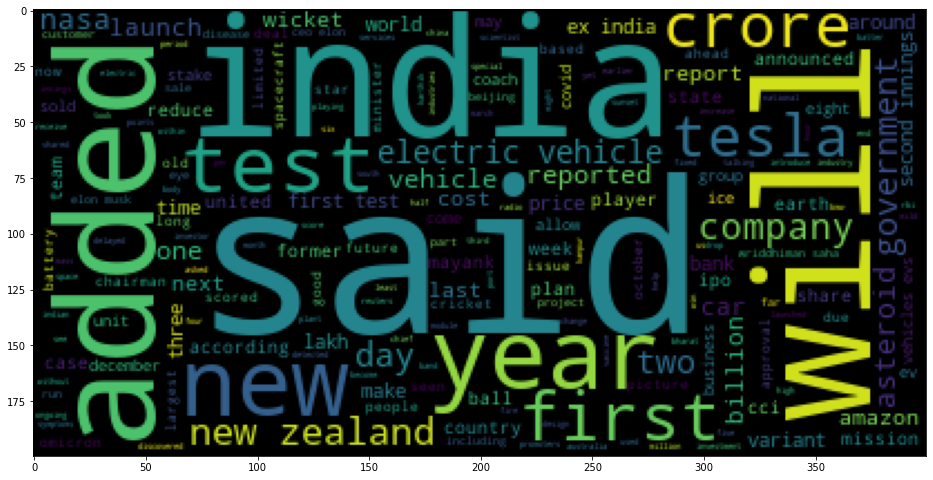

In [156]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,24))
wc = WordCloud().generate(all_text_wc)
plt.imshow(wc)

In [157]:
# Pre-processing
sw = stopwords.words('english')
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [158]:
# Stemming
ps = PorterStemmer()
filtered_docs = []

for doc in df_news.Title:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw and len(w) > 3:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

print(filtered_docs)

["studi indic climat chang caus split coupl among popul albatross otherwis long-term monogam relationship bird 'divorc rate year warmer water temperatur rose around studi show 'divorc trigger pair fail breed find partner next season ", 'chief scientist soumya swaminathan said covid-19 variant wake-up call virus step ahead ad hope vaccin continu stay effect differ variant vaccin elicit broad-bas immun focu increas vaccin coverag ', 'talk wicketkeeper-batt wriddhiman saha unbeaten knock run zealand dinesh karthik said good somebodi leg push peopl show done thi could easili last test inning pressur bring srikar bharat next test karthik ad ', 'eighth tranch sovereign gold bond scheme 2021-22 open subscript monday fix issu price ₹4,791 gram discount gram given investor appli onlin make payment digit mode tenor bond period eight year ', "american space agenc nasa instagram page share pictur 'cosmic reef vast star-form region larg magellan cloud locat 1.63 lakh light year away earth name rese

In [160]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = TFIDF_vectorizer.fit_transform(filtered_docs)
print(X.todense())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [162]:
from sklearn.cluster import KMeans
# for K = 3

K_3 = 3
TFIDF_model_3 = KMeans(n_clusters=K_3, max_iter=100)
TFIDF_model_3.fit(X)

print("cluster no. of input documents, in the order they received:")
print(TFIDF_model_3.labels_)

TFIDF_centroids_3 = TFIDF_model_3.cluster_centers_
print(TFIDF_centroids_3)

df_news['pred_lab_K_3'] = TFIDF_model_3.labels_

cluster no. of input documents, in the order they received:
[0 2 2 1 2 1 0 0 0 2 1 1 0 1 0 2 0 1 1 2 0 0 0 1 0 2 2 0 0 1 1 1 0 0 0 0 1
 2 1 2 1 0 2 1 0 2 1 2 0 0 2 0 0 1 0 0 1 2 2 0 2 0 2 0 2 2 2 2 1 1 2 2 0 2
 1 2 0 2 2 0 2 0 0 2 1 2 1 2 0 0 0 2 0 1 2 2 0 1 0 0]
[[0.         0.         0.         ... 0.00230109 0.00230109 0.00230109]
 [0.00377306 0.00377306 0.00377306 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [163]:
df_news.head()

,Title,class,WC,pred_lab_K_3
0,A new study has indicated that climate change ...,science,a new study has indicated that climate change ...,0
1,WHO Chief Scientist Soumya Swaminathan has sai...,science,who chief scientist soumya swaminathan has sai...,2
2,Talking about wicketkeeper-batter Wriddhiman S...,sports,talking about wicketkeeper-batter wriddhiman s...,2
3,The eighth tranche of Sovereign Gold Bond Sche...,business,the eighth tranche of sovereign gold bond sche...,1
4,American space agency NASA's Instagram page ha...,science,american space agency nasa's instagram page ha...,2


In [165]:
test_doc = ["I like football London",
             "Bitcoin is great.",
             "Avenge the dinosaurs: Elon Musk on NASA's mission to crash spacecraft into asteroid",
             "After Airtel and Vodafone Idea, Jio hikes prepaid tariffs",
             "Renault unveils flying car concept with no wheels that can fly at 93 kmph"
           ]
filtered_test_docs = []
for doc in test_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw and len(w)> 3:
            tmp += ps.stem(w) + " "
    filtered_test_docs.append(tmp)

print(filtered_test_docs)

Y = TFIDF_vectorizer.transform([filtered_test_docs[0]])
prediction = TFIDF_model_3.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[1]])
prediction = TFIDF_model_3.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[2]])
prediction = TFIDF_model_3.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[3]])
prediction = TFIDF_model_3.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[4]])
prediction = TFIDF_model_3.predict(Y)
print(prediction)

['like footbal london ', 'bitcoin great ', 'aveng dinosaur elon musk nasa mission crash spacecraft asteroid ', 'after airtel vodafon idea hike prepaid tariff ', 'renault unveil fli concept wheel kmph ']
[0]
[0]
[2]
[2]
[1]


In [169]:
# for K = 4

K_4 = 4
TFIDF_model_4 = KMeans(n_clusters=K_4, max_iter=100)
TFIDF_model_4.fit(X)

print("cluster no. of input documents, in the order they received:")
print(TFIDF_model_4.labels_)

TFIDF_centroids_4 = TFIDF_model_4.cluster_centers_
print(TFIDF_centroids_4)

df_news['pred_lab_K_4'] = TFIDF_model_4.labels_

cluster no. of input documents, in the order they received:
[1 3 1 1 0 1 3 3 2 1 3 2 1 3 2 1 3 0 0 1 3 3 3 3 3 1 0 2 2 0 3 3 2 2 1 3 3
 3 3 1 3 2 1 3 3 1 3 3 3 1 1 2 3 3 2 3 3 1 1 1 1 3 2 1 1 1 2 0 3 3 3 2 3 3
 3 1 3 1 1 3 1 0 0 1 3 1 3 1 3 2 3 0 3 3 1 1 3 3 3 3]
[[0.         0.         0.         ... 0.01022705 0.01022705 0.01022705]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00205058 0.00205058 0.00205058 ... 0.         0.         0.        ]]


In [170]:
df_news.head()

,Title,class,WC,pred_lab_K_3,pred_lab_K_4
0,A new study has indicated that climate change ...,science,a new study has indicated that climate change ...,0,1
1,WHO Chief Scientist Soumya Swaminathan has sai...,science,who chief scientist soumya swaminathan has sai...,2,3
2,Talking about wicketkeeper-batter Wriddhiman S...,sports,talking about wicketkeeper-batter wriddhiman s...,2,1
3,The eighth tranche of Sovereign Gold Bond Sche...,business,the eighth tranche of sovereign gold bond sche...,1,1
4,American space agency NASA's Instagram page ha...,science,american space agency nasa's instagram page ha...,2,0


In [171]:
test_doc = ["I like football London",
             "Bitcoin is great.",
             "Avenge the dinosaurs: Elon Musk on NASA's mission to crash spacecraft into asteroid",
             "After Airtel and Vodafone Idea, Jio hikes prepaid tariffs",
             "Renault unveils flying car concept with no wheels that can fly at 93 kmph"
           ]
filtered_test_docs = []
for doc in test_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw and len(w)> 3:
            tmp += ps.stem(w) + " "
    filtered_test_docs.append(tmp)

print(filtered_test_docs)

Y = TFIDF_vectorizer.transform([filtered_test_docs[0]])
prediction = TFIDF_model_4.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[1]])
prediction = TFIDF_model_4.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[2]])
prediction = TFIDF_model_4.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[3]])
prediction = TFIDF_model_4.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[4]])
prediction = TFIDF_model_4.predict(Y)
print(prediction)

['like footbal london ', 'bitcoin great ', 'aveng dinosaur elon musk nasa mission crash spacecraft asteroid ', 'after airtel vodafon idea hike prepaid tariff ', 'renault unveil fli concept wheel kmph ']
[3]
[3]
[0]
[3]
[3]


In [172]:
# for K = 5

K_5 = 5
TFIDF_model_5 = KMeans(n_clusters=K_5, max_iter=100)
TFIDF_model_5.fit(X)

print("cluster no. of input documents, in the order they received:")
print(TFIDF_model_5.labels_)

TFIDF_centroids_5 = TFIDF_model_5.cluster_centers_
print(TFIDF_centroids_5)

df_news['pred_lab_K_5'] = TFIDF_model_5.labels_

cluster no. of input documents, in the order they received:
[1 2 1 3 4 0 3 0 3 2 0 0 3 3 4 1 1 4 3 1 3 3 0 0 0 1 4 1 2 0 3 2 3 4 2 2 0
 3 0 1 3 1 1 0 3 1 3 2 2 2 1 4 2 0 4 2 0 4 2 2 2 4 2 3 1 1 1 4 0 0 1 3 2 3
 0 1 2 1 1 0 1 4 4 1 0 1 0 4 2 2 2 4 1 0 1 1 2 0 3 2]
[[0.00449174 0.00449174 0.00449174 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00657453 0.00657453 0.00657453]]


In [173]:
df_news.head()

,Title,class,WC,pred_lab_K_3,pred_lab_K_4,pred_lab_K_5
0,A new study has indicated that climate change ...,science,a new study has indicated that climate change ...,0,1,1
1,WHO Chief Scientist Soumya Swaminathan has sai...,science,who chief scientist soumya swaminathan has sai...,2,3,2
2,Talking about wicketkeeper-batter Wriddhiman S...,sports,talking about wicketkeeper-batter wriddhiman s...,2,1,1
3,The eighth tranche of Sovereign Gold Bond Sche...,business,the eighth tranche of sovereign gold bond sche...,1,1,3
4,American space agency NASA's Instagram page ha...,science,american space agency nasa's instagram page ha...,2,0,4


In [174]:
test_doc = ["I like football London",
             "Bitcoin is great.",
             "Avenge the dinosaurs: Elon Musk on NASA's mission to crash spacecraft into asteroid",
             "After Airtel and Vodafone Idea, Jio hikes prepaid tariffs",
             "Renault unveils flying car concept with no wheels that can fly at 93 kmph"
           ]
filtered_test_docs = []
for doc in test_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw and len(w)> 3:
            tmp += ps.stem(w) + " "
    filtered_test_docs.append(tmp)

print(filtered_test_docs)

Y = TFIDF_vectorizer.transform([filtered_test_docs[0]])
prediction = TFIDF_model_5.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[1]])
prediction = TFIDF_model_5.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[2]])
prediction = TFIDF_model_5.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[3]])
prediction = TFIDF_model_5.predict(Y)
print(prediction)

Y = TFIDF_vectorizer.transform([filtered_test_docs[4]])
prediction = TFIDF_model_5.predict(Y)
print(prediction)

['like footbal london ', 'bitcoin great ', 'aveng dinosaur elon musk nasa mission crash spacecraft asteroid ', 'after airtel vodafon idea hike prepaid tariff ', 'renault unveil fli concept wheel kmph ']
[2]
[0]
[4]
[3]
[0]


In [175]:
#CountVectorizer

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
# tokenize and build vocab
V = count_vectorizer.fit_transform(filtered_docs)

In [178]:
# K = 3
count_model_3 = KMeans(n_clusters=K_3, max_iter=100)#, init='k-means++', max_iter=100, n_init=1)
count_model_3.fit(V)

print("cluster no. of input documents, in the order they received:")
print(count_model_3.labels_)

df_news['pred_lab_countvec_3'] = count_model_3.labels_

cluster no. of input documents, in the order they received:
[2 2 2 1 1 2 2 2 1 2 2 1 1 2 1 2 2 2 2 0 2 2 2 2 2 0 2 1 2 2 1 1 1 1 2 1 1
 1 2 0 2 1 0 2 2 0 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 1 1 0 0 1 2 2 2 1 1 2 2
 2 0 2 0 0 1 2 2 1 2 2 0 1 2 1 2 2 2 1 2 0 0 2 1 1 2]


In [181]:
# K = 4
count_model_4 = KMeans(n_clusters=K_4, max_iter=100)#, init='k-means++', max_iter=100, n_init=1)
count_model_4.fit(V)

print("cluster no. of input documents, in the order they received:")
print(count_model_4.labels_)

df_news['pred_lab_countvec_4'] = count_model_4.labels_

cluster no. of input documents, in the order they received:
[3 1 1 3 3 0 3 1 3 1 3 1 1 0 1 3 3 3 1 2 1 1 0 3 0 2 3 1 1 0 1 3 1 1 3 3 0
 0 1 2 1 1 2 1 3 2 1 3 3 3 2 1 1 0 3 3 0 3 1 1 1 3 3 1 2 2 1 3 3 3 3 1 1 1
 3 2 3 2 2 1 3 3 3 3 0 2 1 3 3 3 3 3 3 0 3 1 1 1 1 3]


In [182]:
df_news.head()

,Title,class,WC,pred_lab_K_3,pred_lab_K_4,pred_lab_K_5,pred_lab_countvec_3,pred_lab_countvec_4
0,A new study has indicated that climate change ...,science,a new study has indicated that climate change ...,0,1,1,2,3
1,WHO Chief Scientist Soumya Swaminathan has sai...,science,who chief scientist soumya swaminathan has sai...,2,3,2,2,1
2,Talking about wicketkeeper-batter Wriddhiman S...,sports,talking about wicketkeeper-batter wriddhiman s...,2,1,1,2,1
3,The eighth tranche of Sovereign Gold Bond Sche...,business,the eighth tranche of sovereign gold bond sche...,1,1,3,1,3
4,American space agency NASA's Instagram page ha...,science,american space agency nasa's instagram page ha...,2,0,4,1,3


In [183]:
df_c = df_news[['class', 'pred_lab_K_3', 'pred_lab_K_4', 'pred_lab_K_5', 'pred_lab_countvec_3', 'pred_lab_countvec_4']]
df_c.head()

,class,pred_lab_K_3,pred_lab_K_4,pred_lab_K_5,pred_lab_countvec_3,pred_lab_countvec_4
0,science,0,1,1,2,3
1,science,2,3,2,2,1
2,sports,2,1,1,2,1
3,business,1,1,3,1,3
4,science,2,0,4,1,3
